In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/weight-height.csv')

In [ ]:
df.drop(['Gender'],inplace=True,axis=1)

In [ ]:
df.astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  10000 non-null  float64
 1   Weight  10000 non-null  float64
dtypes: float64(2)
memory usage: 156.4 KB


Text(0, 0.5, 'Height')

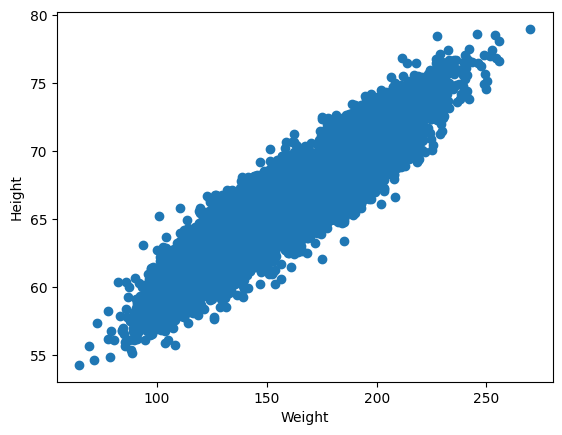

In [ ]:
#scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel("Height")

In [ ]:
df.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


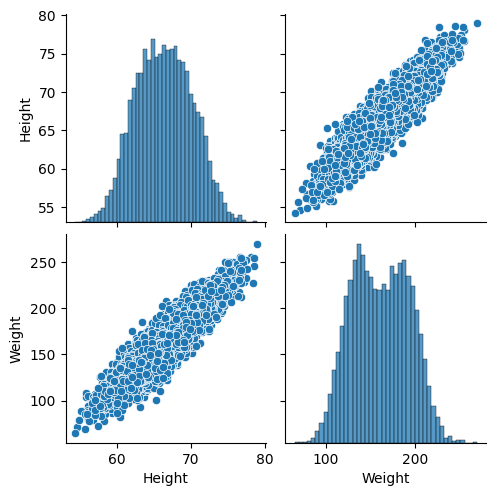

In [ ]:
import seaborn as sns
sns.pairplot(df)

In [ ]:
#independent and dependaent features
X=df[['Weight']]  #independeant feature should be in in dataframe or 2d array
y=df['Height'] #this can be in series and in one d array

In [ ]:
# train the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42 )

In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
## apply lieaner regression
from sklearn.linear_model import LinearRegression

In [ ]:
regression = LinearRegression(n_jobs=-1)

In [ ]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [ ]:
print('slope',regression.coef_)
print('intercept',regression.intercept_)

slope [3.55313486]
intercept 66.32026277291251


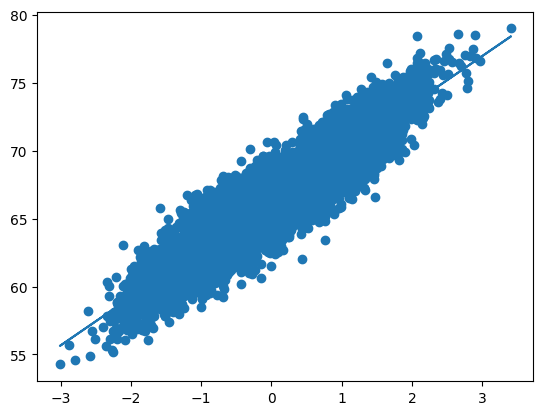

In [ ]:
#plot training data and plot best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

#predicion of test data
1.  predicted height output= intercept + coef_(weight)
2.  y_pred_test = 66.348 + 3.55(X_test)

In [ ]:
#prediction for test data
y_pred=regression.predict(X_test)

In [ ]:
#perfomance matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
mse,mae,rmse

(2.1085956151270167, 1.1600795829040491, 1.4521004149600043)

In [ ]:
#R^2
from sklearn.metrics  import r2_score

In [ ]:
score = r2_score(y_test,y_pred)
score

0.8577922082576351

In [ ]:
#adjusted r^2
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8577447740375743

In [ ]:
#OLS Linear Regression
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()

In [ ]:
predetionn = model.predict(X_test)
predetionn

array([ 1.34015009,  3.78665231,  1.0185147 , ...,  2.28994663,
       -2.51434731,  3.4438509 ])

In [ ]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              20.08
Date:                Fri, 14 Mar 2025   Prob (F-statistic):                    7.55e-06
Time:                        12:54:41   Log-Likelihood:                         -39296.
No. Observations:                7000   AIC:                                  7.859e+04
Df Residuals:                    6999   BIC:                                  7.860e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
## predicion for new data
regression.predict(scaler.transform([[206]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([71.30961907])

In [ ]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
